In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
#checking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values in the dataframe and the feature is numeric feature.

# Distribution of the dataset

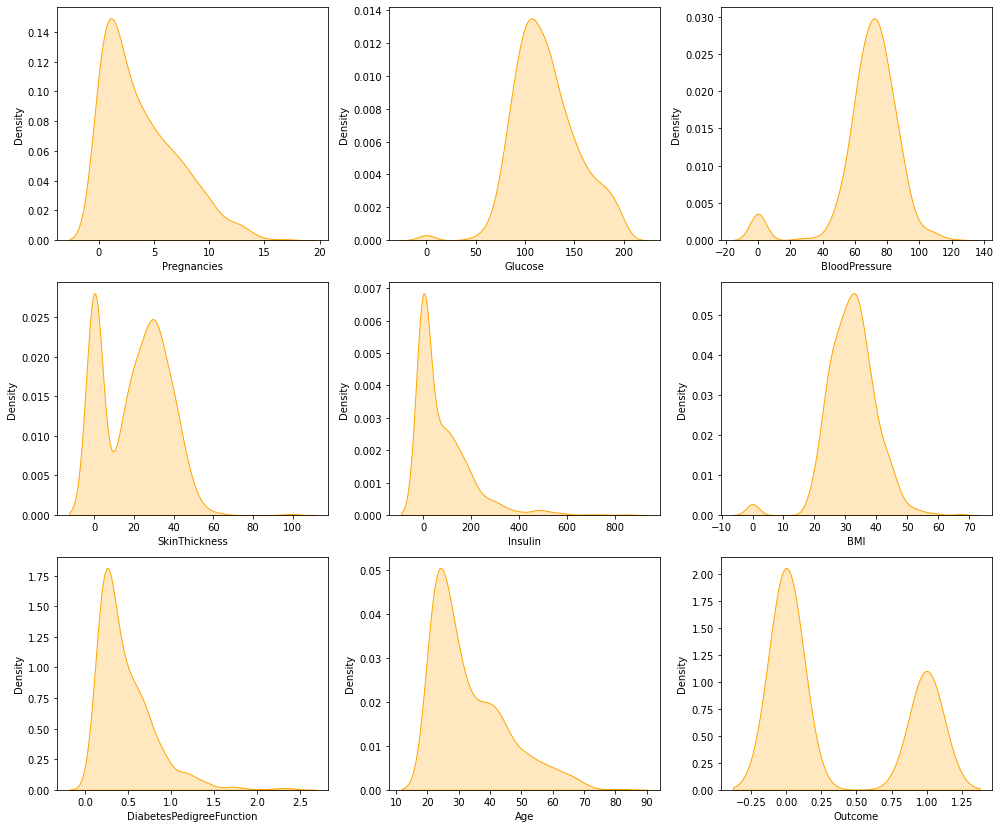

In [45]:
plt.figure(figsize=(14,15))
for i in range(0, len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [32]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [68]:
# Replacing zero values from mean value


In [69]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

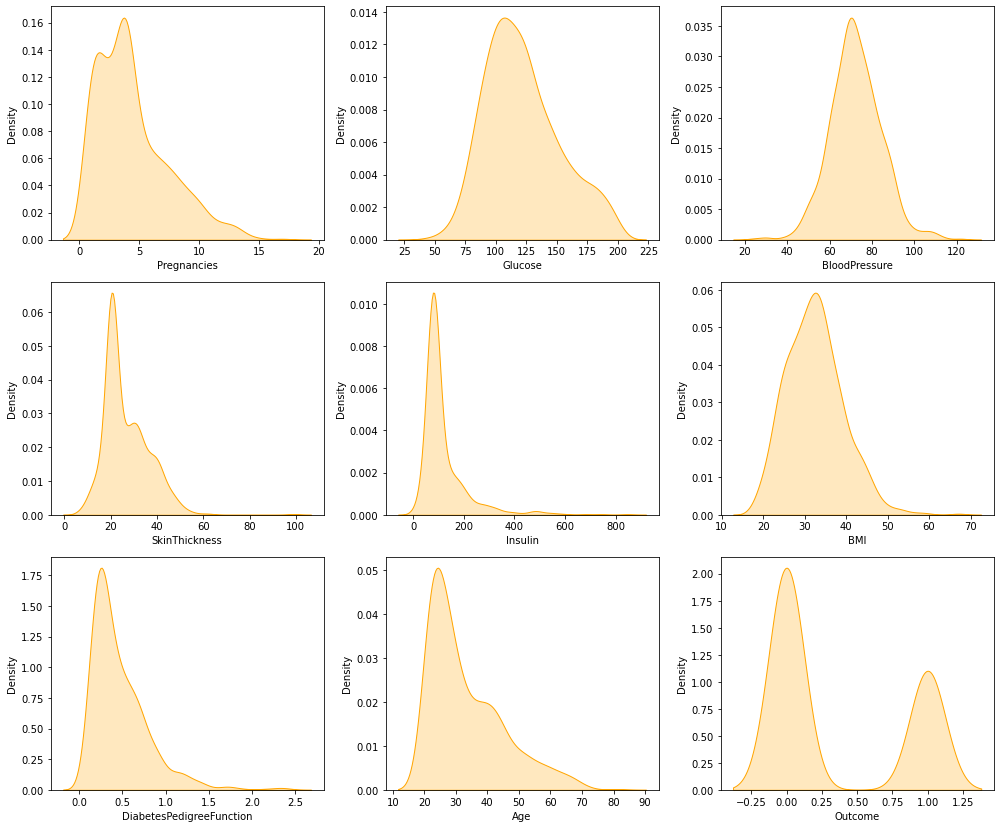

In [70]:
plt.figure(figsize=(14,15))
for i in range(0, len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df[df.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(df.columns[i])
    plt.tight_layout()

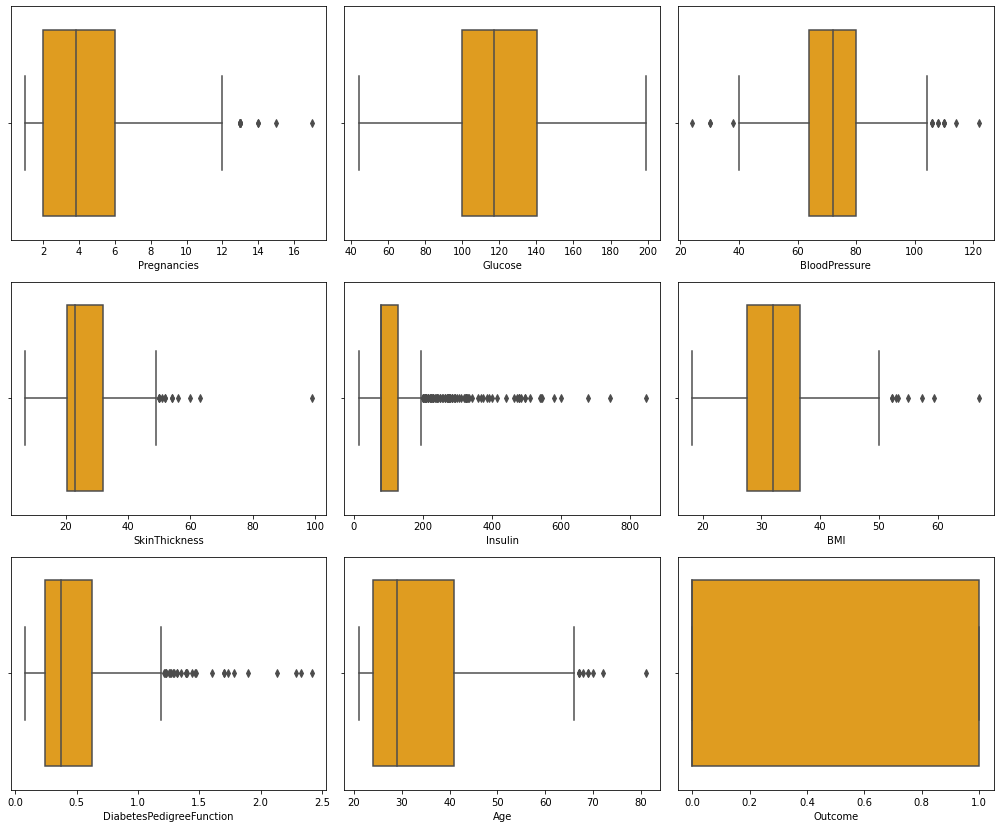

In [75]:
plt.figure(figsize=(14,15))
for i in range(0,len(df.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df[df.columns[i]], color='orange')
    plt.tight_layout()

# Outlier Reduction

In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [77]:
q=df['Pregnancies'].quantile(0.98)
data_cleaned=df[df['Pregnancies']<q]

In [78]:
q=df['SkinThickness'].quantile(0.99)
data_cleaned=df[df['SkinThickness']<q]

In [79]:
q=df['BMI'].quantile(0.99)
data_cleaned=df[df['BMI']<q]

In [80]:
q=df['Insulin'].quantile(0.99)
data_cleaned=df[df['Insulin']<q]

In [108]:
q=df['DiabetesPedigreeFunction'].quantile(0.95)
data_cleaned=df[df['DiabetesPedigreeFunction']<q]

In [99]:
q=df['Age'].quantile(0.99)
data_cleaned=df[df['Age']<q]

In [101]:
data_cleaned.shape

(759, 9)

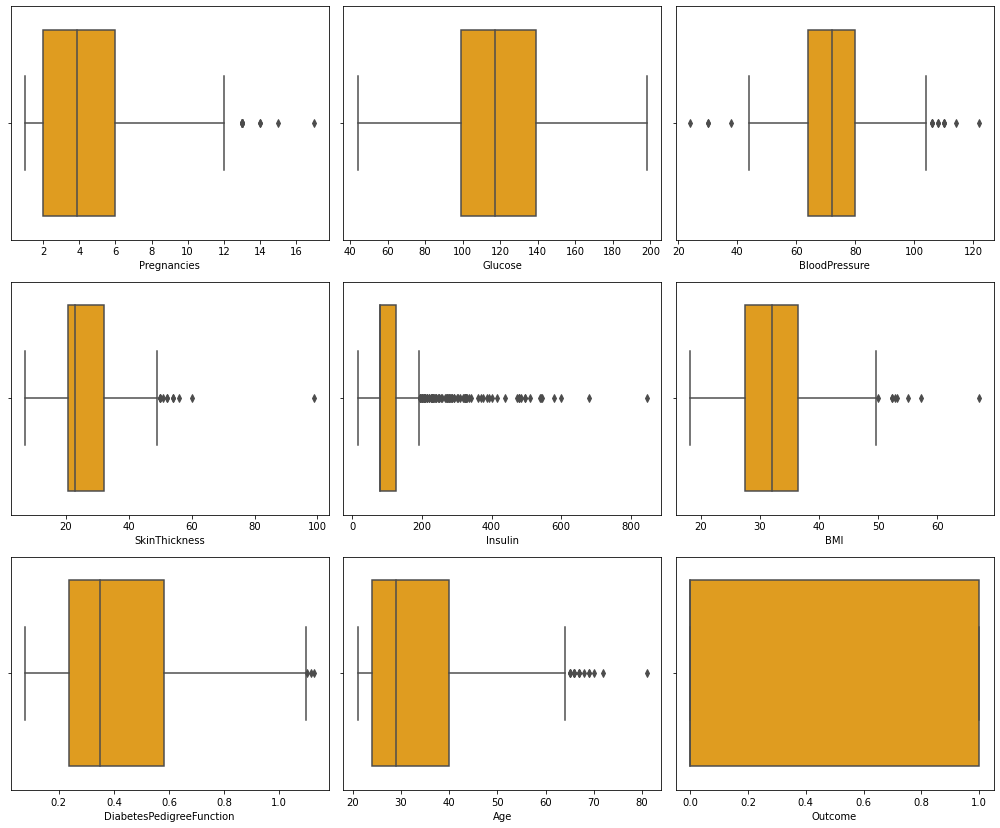

In [110]:
plt.figure(figsize=(14,15))
for i in range(0,len(data_cleaned.columns)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=data_cleaned[data_cleaned.columns[i]], color='orange')
    plt.tight_layout()

In [111]:
#After removing the outlier Now we are checking the distribution

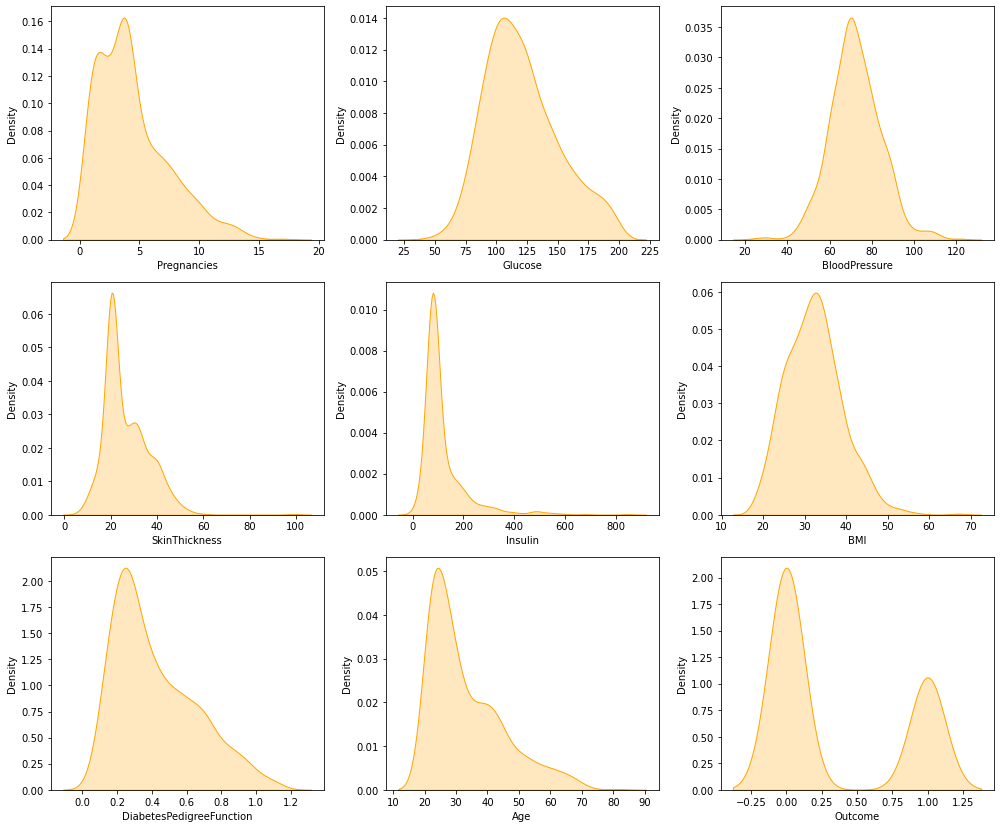

In [112]:
plt.figure(figsize=(14,15))
for i in range(0, len(data_cleaned.columns)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=data_cleaned[data_cleaned.columns[i]], shade=True,color='orange',data=df)
    plt.xlabel(data_cleaned.columns[i])
    plt.tight_layout()

From the above plot we can see that we are almost getting normal distribution

In [117]:
# now we are dividing the dataset into dependent and independent variables
X=data_cleaned.drop(columns=['Outcome'])
Y=data_cleaned['Outcome']

In [118]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5.0,116.0,74.0,20.536458,79.799479,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [119]:
Y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 729, dtype: int64

Before training the dataset let visualize the dataset

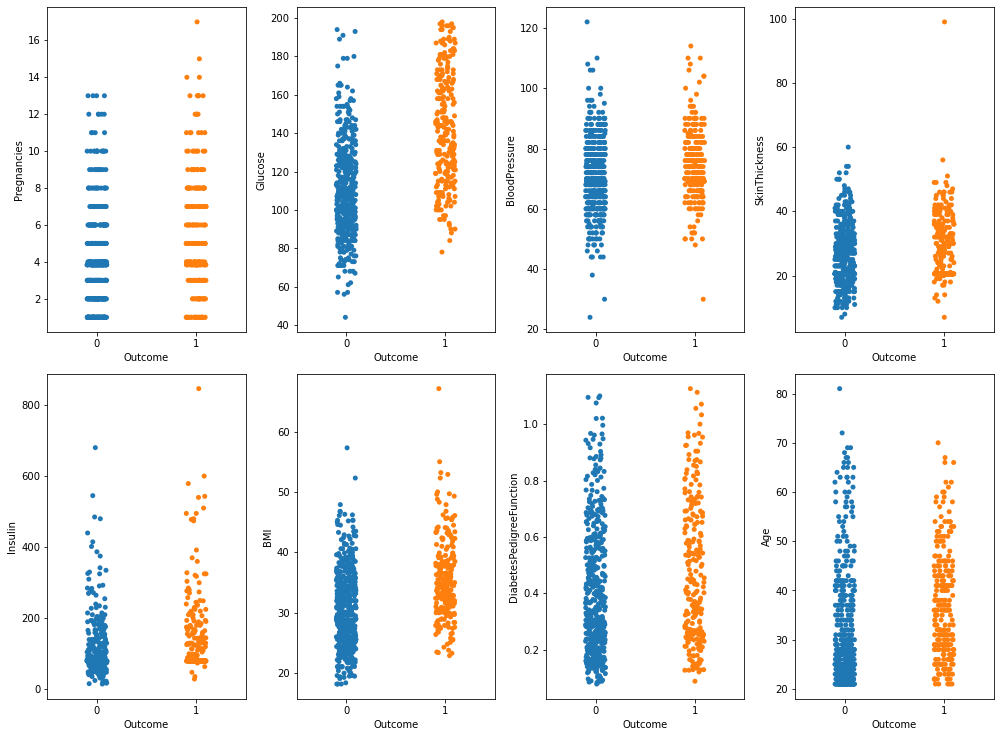

In [122]:
plt.figure(figsize=(14,15))
plt.sup
plotnumber=1
for i in X:
    if plotnumber<=9:
        plt.subplot(3,4,plotnumber)
        sns.stripplot(Y,X[i])
    plotnumber+=1
plt.tight_layout()    